In [83]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from torchvision.transforms import RandomAffine, Normalize, ToTensor, ToPILImage, Resize, InterpolationMode
import torch
import numpy as np

In [2]:
img = cv2.cvtColor(cv2.imread('dynamite.png'), cv2.COLOR_BGR2RGB)

(500, 500, 3)

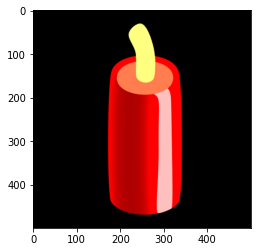

In [47]:
plt.imshow(img)
img.shape

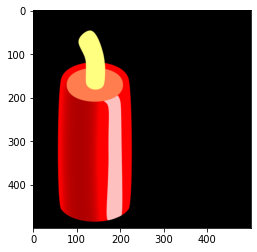

In [4]:
# horizontal and vertical shift
tensor_img = torch.from_numpy(np.transpose(img, (2, 0, 1)))
plt.imshow(np.transpose(RandomAffine(0, (.34, .07))(tensor_img).numpy(), (1,2,0)))

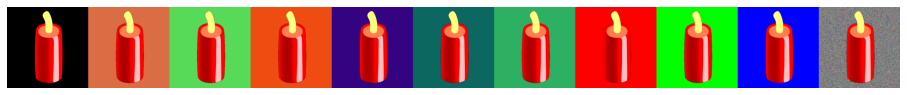

In [15]:
# background augmentation
bgs = [
  *[np.random.randint(0, 255, 3) for i in range(6)],
  [255,0,0], [0,255,0], [0,0,255], None
]
I = [img.copy()]
for bg in bgs:
  imgcp = img.copy()
  for px in range(500):
    for py in range(500):
      rgb = imgcp[px][py]
      if sum(rgb) <= 1:
        if bg is None:
          imgcp[px][py] = np.random.randint(0, 255, 3)
        else:
          imgcp[px][py] = bg
  I.append(imgcp)
plt.figure(figsize=(16,16))
plt.axis('off')
plt.imshow(np.concatenate(I, axis=1))

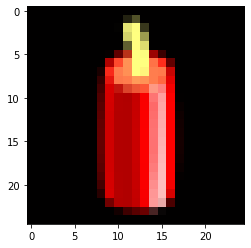

In [75]:
plt.imshow(cv2.resize(img, dsize=(25,25), interpolation=cv2.INTER_AREA))
Resize((25,25))(ToPILImage()(img))

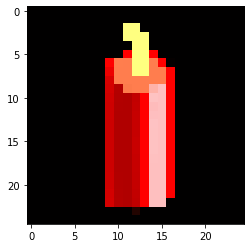

In [91]:
plt.imshow(np.transpose(Resize(size=(25,25))(tensor_img).numpy(), (1,2,0)))

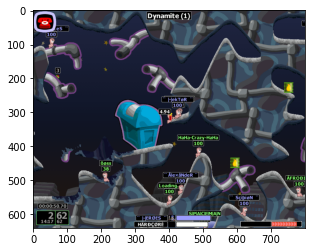

In [16]:
imgu = cv2.cvtColor(cv2.imread('dyna_use.png'), cv2.COLOR_BGR2RGB)
plt.imshow(imgu)

(25, 25, 3)

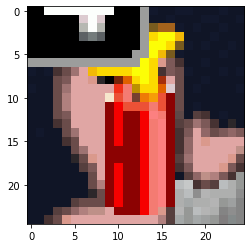

In [55]:
shrink = 300
n = imgu[shrink:-shrink-15,392:-383,:]
plt.imshow(n)
n.shape

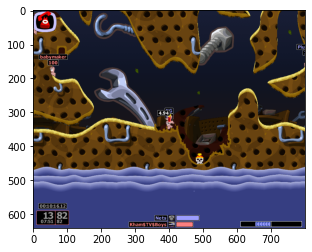

In [92]:
imgu2 = cv2.cvtColor(cv2.imread('dynau2.png'), cv2.COLOR_BGR2RGB)
plt.imshow(imgu2)

(25, 25, 3)

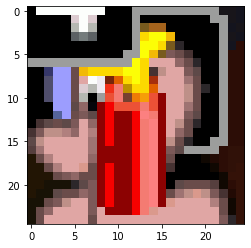

In [100]:
shrink = 300
n2 = imgu2[shrink+4:-shrink-11,390:-385,:]
plt.imshow(n2)
n2.shape